<a href="https://colab.research.google.com/github/RyanChen12035/capstone/blob/main/two_towers_data_prep_TSMC_IT_BSID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conventional two tower strucutre is for recommanding system and it takes in structured data on the query side (clicking or not, staying time..et al.) and retrieve structured data on the candidate side (recommanded youtube channel, tracks on spotify). They use DNN on both sides and train the two tower model so they are sharing a same embedding space.

In this case, we are aiming for taking in structured data such as prompt here, and retrieve confidential data in the candidate tower. As a result, we meed a BERT model and its embedding to power the vector database. We plan to train a BERT model and set it as the main body of both towers. Extract the embedding from the last layer of the Transformer in the BERT and use it to power FAISS vector database.

Part 1 Data preparation: Set job title as our blacklist. Mix data of job description and medical diagnosis each with 0 and 1 tagging.
Encapsulate it with torch dataset and dataloader, split and shuffle

Part 2 Model and tokenizer: training a text classification model.

Part 3 Extract the embedding space of BERT model and use it to power the vector database.

In [1]:
!pip install PyPDF2 -q
!pip install langchain -q
!pip install sentence-transformers -q
!pip install pydot --quiet
!pip install transformers --quiet
!pip install datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Traceback (most recent call last):

In [5]:
import numpy as np
import pandas as pd
from datasets import load_dataset
import re
import random
from bs4 import BeautifulSoup
import html

In [6]:
!pwd

/content


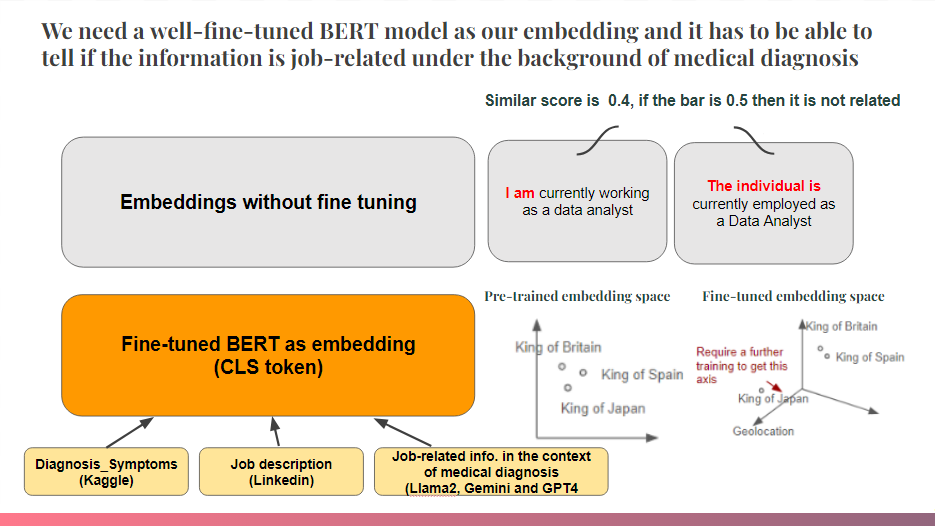

Since we split the prompt into chunks when doing a similar search on a vector database. As a result, to cooperate with the vector database, we also have to train our model in the compatible prompt in length.

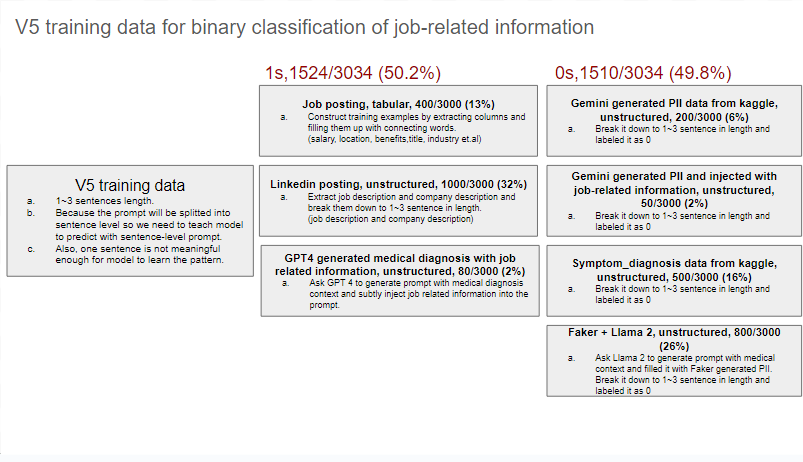

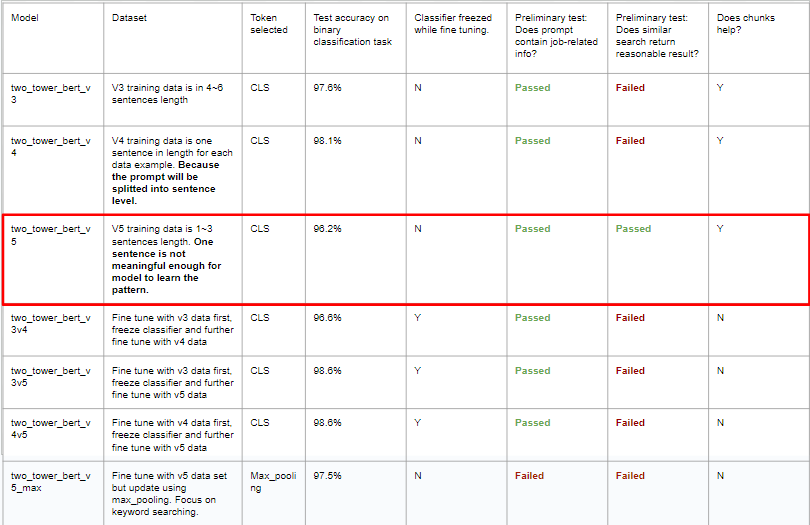

Download data from Kaggle

In [94]:
# control + enter ten times
df = pd.read_csv("./fake_job_postings.csv")
df.head(5)
df_job_blend = df
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [95]:
def concatenate_cols(row):
    if pd.isna(row['department']):
        row['department'] = 'freelancing'
    if pd.isna(row['salary_range']):
        row['salary_range'] = 'negotiable'
    if pd.isna(row['benefits']):
        row['benefits'] = 'negotiable'
    if pd.isna(row['industry']):
        row['industry'] = 'service industry'

    # data augmentation
    if row['job_id'] % 5 == 0:
        job_description = f"{row['title']} and the salary range is {row['salary_range']}."
    elif row['job_id'] % 5 == 1:
        job_description = f"Being a {row['title']} at {row['location']}, my department is {row['department']}."
    elif row['job_id'] % 5 == 2:
        job_description = f"I am doing my job in {row['department']} and the benefits are {row['benefits']}."
    elif row['job_id'] % 5 == 3:
        job_description = f"My company is at {row['location']} and the payroll is around {row['salary_range']}."
    else:
        job_description = f"I am working at {row['industry']} and my job is {row['title']}."

    return job_description

df['prompt'] = df.apply(lambda row: concatenate_cols(row), axis=1)
df['related_to_job'] = 1
df_salary_location_benefits = df[['prompt', 'related_to_job']]
df_salary_location_benefits.head(10)

,prompt,related_to_job
0,"Being a Marketing Intern at US, NY, New York, ...",1
1,I am doing my job in Success and the benefits ...,1
2,"My company is at US, IA, Wever and the payroll...",1
3,I am working at Computer Software and my job i...,1
4,Bill Review Manager and the salary range is ne...,1
5,"Being a Accounting Clerk at US, MD, , my depar...",1
6,I am doing my job in ANDROIDPIT and the benefi...,1
7,"My company is at US, CA, San Francisco and the...",1
8,I am working at Information Technology and Ser...,1
9,Customer Service Associate - Part Time and th...,1


In [96]:
print(df_salary_location_benefits['prompt'].shape)
df_salary_location_benefits['prompt'][1]

(17880,)


'I am doing my job in Success and the benefits are What you will get from usThrough being part of the 90 Seconds team you will gain:experience working on projects located around the world with an international brandexperience working with a variety of clients and on a large range of projectsopportunity to drive and grow production function and teama positive working environment with a great teamPay$40,000-$55,000Applying for this role with a VIDEOBeing a video business, we understand that one of the quickest ways that we can assess your suitability for this role, and one of the quickest ways that you can apply for it, is for you to submit a 60-90 second long video telling us about yourself, your experience and why you think you would be perfect for the role. \xa0It’s not about being a filmmaker or making a really creative video. \xa0A simple video filmed with a smart phone or web cam will be fine. Please also include where you are based and when you can start.You can upload the video o

In [97]:
# trim off the context between the length of 50 to 250 characters
df_salary_location_benefits = df_salary_location_benefits[df_salary_location_benefits['prompt'].apply(len).between(50, 250)]

In [98]:
df_salary_location_benefits.shape

(16437, 2)

Try Linkedin dataset

In [206]:
df_linkedin_jobposting = pd.read_csv("./job_postings.csv")
df_linkedin_companies = pd.read_csv("./companies.csv")

In [213]:
df_linkedin_jobposting.head(3)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644


In [214]:
df_linkedin_jobposting['description'][1]

'Metalcraft of Mayville\nMetalcraft of Mayville is an Equal Opportunity Employer:Minorities/females/veterans/individuals with disabilities/sexual orientation/gender identity\nShipping & Receiving Associate 2nd shift (Beaver Dam)\nUS-WI-Beaver Dam\nJob ID: 2023-3251\nType: Regular Full-Time\n# of Openings: 1\nCategory: Manufacturing\nMetalcraft of Mayville (Beaver Dam)\nOverview\nUnder the direction of Shipping/Receiving Supervisor, this position packs and prepares customer orders for shipping, receives material and equipment, and loads and unloads trucks according to established procedures and shipping regulations, meeting customer delivery requirements. Assigned daily details where needed within the shipping and receiving department.\n \n2nd Shift Opening\nResponsibilities\nUse of material handling dollies, forklifts, and other material moving equipment for unload/load of inbound/outbound freight. Opens boxes and inspects contents of inbound materials. Checks supplier shipping invoice

In [215]:
def split_text_paragraph(text: str) -> list[str]:
  paragraphs = re.split(r'\n\s*\n', text)
  return paragraphs

def split_paragraph_sentence(paragraphs: list[str]) -> list[str]:
  sentences = [re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', para) for para in paragraphs]
  return sentences

def concatenate_short_sentences(sentence_list: list[str], characters_limit: int) -> list[str]:
    concatenated_sentences = []
    i = 0
    while i < len(sentence_list):
        if len(sentence_list[i]) < characters_limit and (i+1) < len(sentence_list):
            concatenated_sentences.append(sentence_list[i] + " " + sentence_list[i+1])
            i += 2
        else:
            concatenated_sentences.append(sentence_list[i])
            i += 1
    return concatenated_sentences

def split_to_sentences(text: str) -> list[str]:
    paragraphs = re.split(r'\n\s*\n', str(text))
    sentences = [re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', para) for para in paragraphs]
    sentence_expanded = [sentence for sublist in sentences for sentence in sublist if len(sentence) > 50 and len(sentence) < 250]
    # if the sentence length < 200 then it would be concatenated with the following sentences so the overall prompt length would lay within one to three sentences
    # prompt length can be 1. one sentence with 200~250 in length, 2. two sentence (<200) 200 + 200 in length or 50 + 50
    return concatenate_short_sentences(sentence_expanded, 200)

In [216]:
# characters_limit = 150
df_linkedin_jobposting['description'] = df_linkedin_jobposting['description'].apply(split_to_sentences)

In [217]:
df_linkedin_jobposting.head(3)['description'][1]

['Assigned daily details where needed within the shipping and receiving department. 2nd Shift Opening\nResponsibilities\nUse of material handling dollies, forklifts, and other material moving equipment for unload/load of inbound/outbound freight.',
 'Opens boxes and inspects contents of inbound materials. Checks supplier shipping invoice to ensure all items are accounted for.',
 'Maintains quality records and requirements of all inbound/outbound processed materials. Communicates directly with Metalcraft purchasing department personnel to resolve inbound receipt discrepancies.',
 'Stores, restocks, and shelves delivery items on shop floor as necessary. Processes location transfers for inbound materials moving on to another shop floor location.',
 'Reports all major or unresolved inbound receipt delays or issues to manager. Ensure compliance with corporate and plant safety standards.Complete and maintain all required paperwork.',
 'Education and/or Experience2+ years previous inbound/out

In [ ]:
# Use apply and pd.Series to expand the lists into rows
df_job_posting = df_linkedin_jobposting['description'].apply(pd.Series).stack().reset_index(drop=True).to_frame(name='prompt')
df_job_posting['related_to_job'] = 1
df_job_posting

<ipython-input-67-8c7b8316d920>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_job_posting = df_linkedin_jobposting['description'].apply(pd.Series).stack().reset_index(drop=True).to_frame(name='prompt')


,prompt,related_to_job
0,HearingLife is a national hearing care company...,1
1,HearingLife operates more than 600 hearing car...,1
2,Our vision is to help more people hear better ...,1
3,We create trust We are team players We appl...,1
4,The Hearing Care Provider acts in accordance w...,1
...,...,...
282961,Insurance is extremely rewarding – it’s a care...,1
282962,My philosophy as an employer is that I do my b...,1
282963,Karen Marie is looking for an awesome experien...,1
282964,We are looking for a full to part-time stylist...,1


In [ ]:
df_job_posting.shape

(282966, 2)

Company description

In [ ]:
df_linkedin_companies

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
11358,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
11359,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [ ]:
# characters_limit = 200
df_linkedin_companies['description'] = df_linkedin_companies['description'].apply(split_to_sentences)
df_companies = df_linkedin_companies['description'].apply(pd.Series).stack().reset_index(drop=True).to_frame(name='prompt')
df_companies['related_to_job'] = 1

<ipython-input-90-66ddcdf844bb>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_companies = df_linkedin_companies['description'].apply(pd.Series).stack().reset_index(drop=True).to_frame(name='prompt')


In [ ]:
print(df_companies.shape)
df_companies

(33638, 2)


,prompt,related_to_job
0,"We create as technologists, developers, and en...",1
1,"We're here to help every creator turn their ""w...",1
2,Every day millions of people feel the impact o...,1
3,"GE Power, part of GE Vernova, is a world energ...",1
4,Official LinkedIn of Hewlett Packard Enterpris...,1
...,...,...
33633,- Is your organization trying to beat the comp...,1
33634,Sidley is an elite global law firm with nearly...,1
33635,"Our firm boasts a roster of more than 2,300 la...",1
33636,"Our offices are found in Beijing, Boston, Brus...",1


In [ ]:
df_companies['prompt'][5]

'We’re a cloud technology company that provides organizations around the world with computing infrastructure and software to help them innovate, unlock efficiencies and become more effective. We also created the world’s first – and only – autonomous database to help organize and secure our customers’ data.'

In [ ]:
df_companies.shape

(33638, 2)

In [207]:
# download diagnosis data from hugging face and mix them together
# Load a dataset by name from the Hugging Face Hub
# https://huggingface.co/datasets/gretelai/symptom_to_diagnosis
symptom_to_diagnosis = load_dataset("gretelai/symptom_to_diagnosis")
symptom_to_diagnosis = symptom_to_diagnosis['train']
df_diagnosis = symptom_to_diagnosis.to_pandas()
df_diagnosis['related_to_job'] = 0
df_diagnosis = df_diagnosis.rename(columns={'input_text': 'prompt'})
df_diagnosis = df_diagnosis[['prompt', 'related_to_job']]
df_diagnosis.head(5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/853 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/212 [00:00<?, ? examples/s]

,prompt,related_to_job
0,I've been having a lot of pain in my neck and ...,0
1,I have a rash on my face that is getting worse...,0
2,I have been urinating blood. I sometimes feel ...,0
3,I have been having trouble with my muscles and...,0
4,I have been feeling really sick. My body hurts...,0


In [210]:
df_diagnosis.shape

(853, 2)

In [211]:
# inject job information into diagnosis
df_diagnosis_blend = symptom_to_diagnosis.to_pandas()
df_dia_job = pd.concat([df_job_blend.iloc[:400], df_diagnosis_blend.iloc[:400]], axis=1) # col-wise
df_dia_job.head(2)

def df_blend(row):
    if row['job_id'] % 5 == 0:
        diagnosis = row['input_text'][:200]
        job_description = f"{row['title']} and the salary range is {row['salary_range']} "
        return diagnosis + job_description
    elif row['job_id'] % 5 == 1:
        diagnosis = row['input_text'][:200]
        job_description = f"I am doing {row['title']} at {row['location']} "
        return diagnosis + job_description
    elif row['job_id'] % 5 == 2:
        diagnosis = row['input_text'][:200]
        job_description = f"I am doing {row['requirements']} "
        return job_description + diagnosis
    elif row['job_id'] % 5 == 3:
        diagnosis = row['input_text'][:200]
        job_description = f"I am doing {row['requirements']} "
        job_description_2 = f"by the way, the salary range is around {row['salary_range']} "
        return job_description + diagnosis + job_description_2
    elif row['job_id'] % 5 == 4:
        diagnosis = row['input_text'][:200] + ". "
        job_description = f"{row['company_profile']}, {row['description']}"
        return job_description + diagnosis

df_dia_job['prompt'] = df_dia_job.apply(lambda row: df_blend(row), axis=1)
df_dia_job['related_to_job'] = 1
df_dia_job_blend = df_dia_job[['prompt', 'related_to_job']]
df_dia_job_blend.head(2)

,prompt,related_to_job
0,I've been having a lot of pain in my neck and ...,1
1,I am doing What we expect from you:Your key re...,1


In [212]:
print(df_dia_job_blend['prompt'][0])

I've been having a lot of pain in my neck and back. I've also been having trouble with my balance and coordination. I've been coughing a lot and my limbs feel weak.I am doing Marketing Intern at US, NY, New York 


In [ ]:
# combine PII by Gemini which is irrelevant to medical diagnosis and diagnosis data. It's better to use medical + PII
# https://www.kaggle.com/code/newtonbaba12345/pii-detection-data-generation-using-gemini/notebook
df_PII = pd.read_csv("./pii_gemini.csv", error_bad_lines=False)
df_PII.head(5)

<ipython-input-104-e336b766bb90>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_PII = pd.read_csv("./pii_gemini.csv", error_bad_lines=False)


,Unnamed: 0,Essay,EMAIL,USERNAME,ID_NUM,PHONE_NUM,URL_PERSONAL,STREET_ADDRESS
0,1,"As an essay writer, I am tasked with the respo...","['udavis@hotmail.com', 'jrodriguez@yahoo.com']",['kelleylisa'],[],['+1-839-789-4719'],['https://facebook.com/kellylopez'],"['1122 Megan Squares Suite 848\nPort Jason, TX..."
1,3,"Tyler Lopez, a diligent student with the usern...","['mendozajessica@gmail.com', 'stephenschristin...",['walkerdeborah'],['LNFB87091634579230'],"['+1-622-758-4197x20769', '(942)780-7150x8423']","['https://github.com/emily99', 'https://twitte...","['523 Dana Lane\nJohnsonshire, MT 87296', '142..."
2,5,"Education is the key to a brighter future, and...",['ihays@yahoo.com'],['woodsjohn'],"['146JFQ', '1JN1877']",['351-371-7604x52296'],['https://instagram.com/gonzalezjeffrey'],"['8847 Kramer Station\nSouth Christopher, IN 3..."
3,6,"In today's modern era, the internet has become...",['leachshannon@hotmail.com'],[],"['GDPM43039213765821', 'GB63TPES66875773893055...",['8402752275'],['https://facebook.com/gregorylinda'],"['634 Petersen Orchard\nLawsonbury, PR 03185']"
4,7,My academic journey has been a tapestry woven ...,['pbrown@gmail.com'],['justingreer'],"['057-05-7887', '79-1256E']","['2972670172', '+1-992-751-8536x710']",['https://github.com/montesjennifer'],"['4183 Kimberly Mills\nKatherinemouth, MI 83340']"


In [ ]:
# 200
df_PII['Essay'] = df_PII['Essay'].apply(split_to_sentences)
df_PII = df_PII['Essay'].apply(pd.Series).stack().reset_index(drop=True).to_frame(name='prompt')
df_PII['related_to_job'] = 0
df_PII.head(5)

,prompt,related_to_job
0,"As an essay writer, I am tasked with the respo...",0
1,She can be reached at the phone number +1-839-...,0
2,Linda's educational journey is not without its...,0
3,"Nonetheless, her unwavering determination and ...",0
4,"Through these engagements, she has developed v...",0


In [ ]:
df_PII.shape

(33949, 2)

In [ ]:
# faker generated PII with customized template (by Zack) and ask Llama2 to refine it.
df_diag_PII = pd.read_csv("./generated_symptoms_name_age_full_prompt3_v2_no_prompt_processed - e2e_test - generated_symptoms_name_age_full_prompt3_v2_no_prompt_processed - e2e_test.csv", error_bad_lines=False)

<ipython-input-107-88455dfdea9a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_diag_PII = pd.read_csv("./generated_symptoms_name_age_full_prompt3_v2_no_prompt_processed - e2e_test - generated_symptoms_name_age_full_prompt3_v2_no_prompt_processed - e2e_test.csv", error_bad_lines=False)


In [ ]:
df_diag_PII['original_prompt'][0]

"As Jane Cook, I am writing to let my doctor know about my current health status. Over the past few days, I have been experiencing fever, fatigue, and difficulty breathing, which has made it hard for me to carry out daily activities. My blood pressure is low, but my cholesterol level is normal.\n  I am feeling really tired and weak, and even simple tasks like getting dressed or taking a shower leave me exhausted. My breathing is labored, and I often feel winded after just a few minutes of talking or walking. The fever has been persistent, and it's making me feel quite uncomfortable.\n  Given my symptoms, I am worried that there might be something serious going on with my health. I would greatly appreciate it if you could look into this matter as soon as possible and let me know what is causing these symptoms. My email address is williamsjennifer@example.net, and my phone number is 001-974-704-4096x550. Thank you for your attention to this matter.\n  I am looking forward to hearing from

In [ ]:
df_diag_PII['original_prompt'] = df_diag_PII['original_prompt'].apply(split_to_sentences)
df_diag_PII = df_diag_PII['original_prompt'].apply(pd.Series).stack().reset_index(drop=True).to_frame(name='prompt')
df_diag_PII['related_to_job'] = 0
df_diag_PII

,prompt,related_to_job
0,"As Jane Cook, I am writing to let my doctor kn...",0
1,"My blood pressure is low, but my cholesterol l...",0
2,"My breathing is labored, and I often feel wind...",0
3,"Given my symptoms, I am worried that there m...",0
4,My email address is williamsjennifer@example.n...,0
...,...,...
1752,"Sincerely,\nShirley Andrews (halebenjamin@exam...",0
1753,I am writing to let you know about my health s...,0
1754,"Also, I feel extremely weak most of the time, ...",0
1755,316 Pearsonberg MS 63025; my email is zlittle@...,0


In [ ]:
# GPT4 generated
df_GPT_job_related_1 = pd.read_csv("./medical_job_related_prompts.csv", error_bad_lines=False)
df_GPT_job_related_2 = pd.read_csv("./non_medical_job_related_prompts.csv", error_bad_lines=False)
df_GPT_job_related_3 = pd.read_csv("./gpt_generated.csv", error_bad_lines=False)
df_GPT_job_related_4 = pd.read_csv("./gpt_generated_1.csv", error_bad_lines=False)
df_GPT_job_related_5 = pd.read_csv("./gpt_generated_2.csv", error_bad_lines=False)

df_GPT_job_related = pd.concat([df_GPT_job_related_1, df_GPT_job_related_2, df_GPT_job_related_3, df_GPT_job_related_4, df_GPT_job_related_5])
df_GPT_job_related.rename(columns={'label': 'related_to_job'}, inplace=True)
df_GPT_job_related.head(5)

<ipython-input-110-be16f7edba40>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_GPT_job_related_1 = pd.read_csv("./medical_job_related_prompts.csv", error_bad_lines=False)
<ipython-input-110-be16f7edba40>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_GPT_job_related_2 = pd.read_csv("./non_medical_job_related_prompts.csv", error_bad_lines=False)
<ipython-input-110-be16f7edba40>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_GPT_job_related_3 = pd.read_csv("./gpt_generated.csv", error_bad_lines=False)
<ipython-input-110-be16f7edba40>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_GPT_job_relate

,prompt,related_to_job
0,"The patient reports persistent back pain, exac...",1
1,The patient describes experiencing frequent he...,1
2,The patient complains of stress and a lack of ...,1
3,The patient presents with symptoms of carpal t...,1
4,The patient has symptoms of chronic fatigue an...,1


In [ ]:
print(df_GPT_job_related.shape)
df_GPT_job_related

(84, 2)


,prompt,related_to_job
0,"The patient reports persistent back pain, exac...",1
1,The patient describes experiencing frequent he...,1
2,The patient complains of stress and a lack of ...,1
3,The patient presents with symptoms of carpal t...,1
4,The patient has symptoms of chronic fatigue an...,1
...,...,...
15,"The patient, a flight attendant, complained of...",1
16,A factory worker reported symptoms of hearing ...,1
17,"The patient, an event planner, discussed exper...",1
18,A patient working as a librarian reported chro...,1


In [ ]:
print(f"number of job_df {df_salary_location_benefits.shape[0]}") #1, length 100 to 200
print(f"number of df_job_posting {df_job_posting.shape[0]}") #1 high quality, with length 100 to 200
print(f"number of df_companies {df_companies.shape[0]}") #1 high quality, with length 100 to 200
print(f"number of df_diag_PII {df_diag_PII.shape[0]}") #0 by Zach's, with length 100 to 200
print(f"number of diagnosis_df {df_diagnosis.shape[0]}") #0
print(f"number of PII_df {df_PII.shape[0]}") #0 by gemini
print(f"number of dia_PII_df {df_dia_job_blend.shape[0]}") #1 mixture of PII_df and diagnosis_df
print(f"number of df_GPT_job_related {df_GPT_job_related.shape[0]}") #1 and 0 GPT4.0 generated

# in case of imbalanced data
df_job_1 = df_salary_location_benefits.sample(400)
df_job_2 = df_job_posting.sample(500)
df_job_3 = df_companies.sample(500)
df_non_job_1 = df_diag_PII.sample(800)
df_non_job_2 = df_diagnosis.sample(500)
df_non_job_3 = df_PII.sample(200)
df_mix_1 = df_dia_job_blend.sample(50)
df_mix_2 = df_GPT_job_related #84

df_final = pd.concat([df_job_1, df_job_2, df_job_3, df_non_job_1, df_non_job_2, df_non_job_3, df_mix_1, df_mix_2])
print(df_final.shape[0])
df_final.head(5)

number of job_df 16437
number of df_job_posting 282966
number of df_companies 33638
number of df_diag_PII 1757
number of diagnosis_df 853
number of PII_df 33949
number of dia_PII_df 400
number of df_GPT_job_related 84
3034


,prompt,related_to_job
5260,"Being a C++ GRAPHICS PROGRAMMER at BY, HM, M...",1
17451,I am doing my job in Customer Success and the ...,1
7363,I am working at Internet and my job is Designe...,1
10835,"Being a Customer Service Associate at US, CA,...",1
15408,I am working at Education Management and my jo...,1


In [ ]:
df_final[df_final['related_to_job'] == 0]

,prompt,related_to_job
189,"Despite all of this, my cholesterol levels are...",0
1625,I am hoping that we can discuss a more compreh...,0
69,My appetite has also been affected with sudden...,0
1388,I am also experiencing some pain in my legs an...,0
433,I would appreciate your guidance on what steps...,0
...,...,...
5,The patient has noticed a gradual loss of hear...,0
6,The patient reports frequent episodes of dizzi...,0
7,The patient describes symptoms of blurred visi...,0
8,The patient is experiencing discomfort and swe...,0


In [ ]:
df_final.to_csv('job_PII_diagnosis_5.csv', index=False)